In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rsna-breast-cancer-512-pngs/10289_1390886438.png
/kaggle/input/rsna-breast-cancer-512-pngs/21915_1598001440.png
/kaggle/input/rsna-breast-cancer-512-pngs/5123_1805049792.png
/kaggle/input/rsna-breast-cancer-512-pngs/2821_494034978.png
/kaggle/input/rsna-breast-cancer-512-pngs/47058_338044000.png
/kaggle/input/rsna-breast-cancer-512-pngs/51675_197596660.png
/kaggle/input/rsna-breast-cancer-512-pngs/36714_413497321.png
/kaggle/input/rsna-breast-cancer-512-pngs/46319_1004428353.png
/kaggle/input/rsna-breast-cancer-512-pngs/49299_1137424604.png
/kaggle/input/rsna-breast-cancer-512-pngs/4356_784715438.png
/kaggle/input/rsna-breast-cancer-512-pngs/5881_1504335064.png
/kaggle/input/rsna-breast-cancer-512-pngs/37051_2021087252.png
/kaggle/input/rsna-breast-cancer-512-pngs/59487_159592442.png
/kaggle/input/rsna-breast-cancer-512-pngs/10483_1928261565.png
/kaggle/input/rsna-breast-cancer-512-pngs/44244_746392730.png
/kaggle/input/rsna-breast-cancer-512-pngs/26273_717323131.png
/kag

In [4]:
!pip install -qU python-gdcm pydicom pylibjpeg


In [5]:
 !pip install numpy

In [6]:
import os
import cv2
import glob
import gdcm
import pydicom
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from joblib import Parallel, delayed

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
!pip install tensorflow

In [8]:
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.image as mpimg
pd.options.display.max_columns = 50

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [9]:
def process(f, size=512, save_folder="", extension="png"):
    patient = f.split('/')[-2]
    image = f.split('/')[-1][:-4]

    dicom = pydicom.dcmread(f)
    img = dicom.pixel_array

    img = (img - img.min()) / (img.max() - img.min())

    if dicom.PhotometricInterpretation == "MONOCHROME1":
        img = 1 - img

    img = cv2.resize(img, (size, size))
    cv2.imwrite(save_folder + f"{patient}_{image}.{extension}", (img * 255).astype(np.uint8))


In [10]:
def create_pngs_from_dcms(dcm_path,SAVE_FOLDER,SIZE,EXTENSION):
    train_images = glob.glob(dcm_path)
    len(train_images)  # 54706
    print('...........Images loaded')
    
    os.makedirs(SAVE_FOLDER, exist_ok=True)
    # an empty directory called train_output in kaggle/working path is created
    print('...........New folder created')
    
    _ = Parallel(n_jobs=4)(
    delayed(process)(uid, size=SIZE, save_folder=SAVE_FOLDER, extension=EXTENSION)
    for uid in tqdm(train_images)
    )
    
    print('............Finished')

In [11]:
dcm_path = '/kaggle/input/rsna-breast-cancer-detection/test_images/*/*.dcm'
SAVE_FOLDER = "test_output/"
SIZE = 512
EXTENSION = "png"
create_pngs_from_dcms(dcm_path,SAVE_FOLDER,SIZE,EXTENSION)

...........Images loaded
...........New folder created


  0%|          | 0/4 [00:00<?, ?it/s]

............Finished


In [12]:
train_images = glob.glob('/kaggle/input/rsna-breast-cancer-512-pngs/*.png')

train_images[0]

'/kaggle/input/rsna-breast-cancer-512-pngs/10289_1390886438.png'

  0%|          | 0/6 [00:00<?, ?it/s]

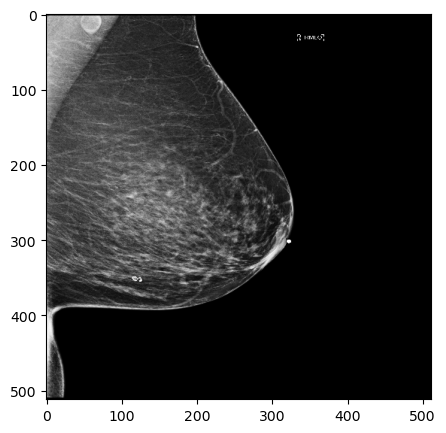

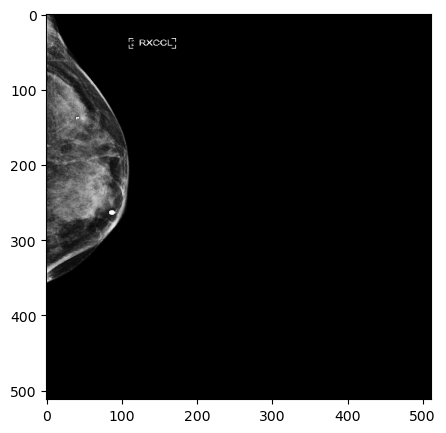

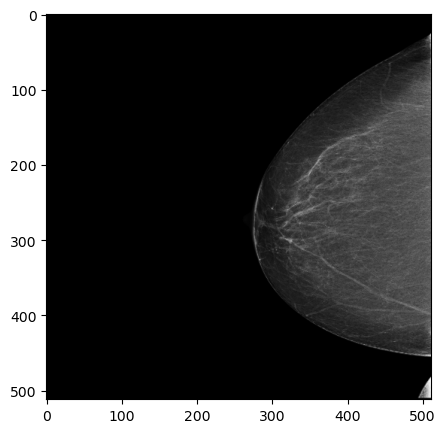

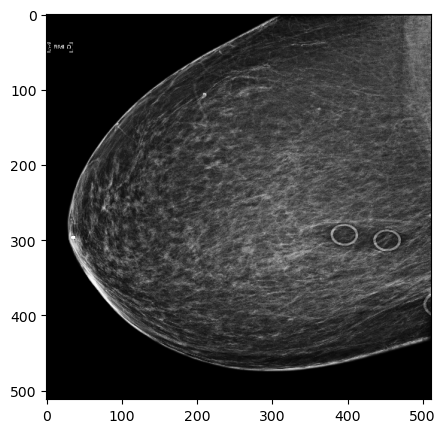

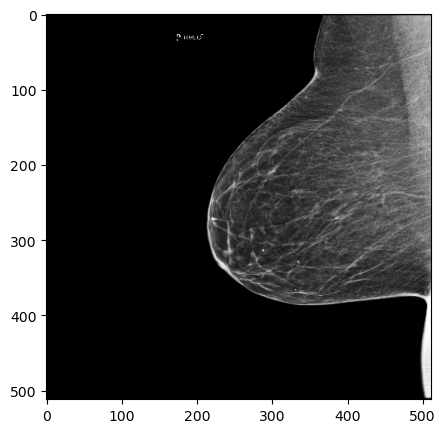

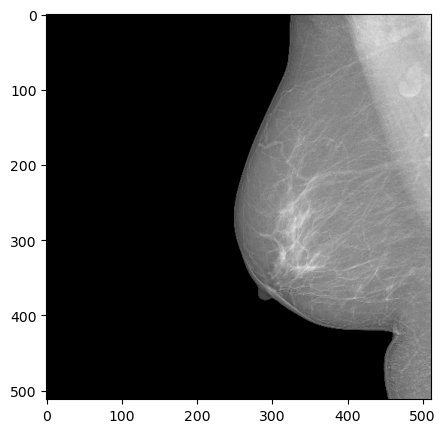

In [13]:
for f in tqdm(train_images[-6:]):
    img = cv2.imread(f)
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap="gray")
    plt.show()

In [14]:
train_df = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')
test_df = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/test.csv')

train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [15]:
train_images = glob.glob('/kaggle/input/rsna-breast-cancer-512-pngs/*.png')

for path in tqdm(train_images):
    name = path.split('/')[-1]
    chunks = name.split('.')[0]
    patient_id = chunks.split('_')[0]
    image_id = chunks.split('_')[1]
    
    idx = (train_df['patient_id']==int(patient_id)) & (train_df['image_id']==int(image_id))
    train_df.loc[idx, 'img_path'] =path

  0%|          | 0/54706 [00:00<?, ?it/s]

In [16]:
train_df[['patient_id','image_id','img_path']].head()
train_df['img_path'][0]

'/kaggle/input/rsna-breast-cancer-512-pngs/10006_462822612.png'

In [17]:
test_images = glob.glob('/kaggle/working/test_output/*.png')

for path in tqdm(test_images):
    name = path.split('/')[-1]
    chunks = name.split('.')[0]
    patient_id = chunks.split('_')[0]
    image_id = chunks.split('_')[1]
    
    idx = (test_df['patient_id']==int(patient_id)) & (test_df['image_id']==int(image_id))
    test_df.loc[idx, 'img_path'] =path

test_df[['patient_id','image_id','img_path']].head()

  0%|          | 0/4 [00:00<?, ?it/s]

patient_id    image_id                                          img_path
0       10008   736471439   /kaggle/working/test_output/10008_736471439.png
1       10008  1591370361  /kaggle/working/test_output/10008_1591370361.png
2       10008    68070693    /kaggle/working/test_output/10008_68070693.png
3       10008   361203119   /kaggle/working/test_output/10008_361203119.png

Feature Engineering

In [18]:
cols = ['image_id','age','machine_id','img_path']
for i in list(train_df.drop(cols,axis=1).columns):
    print(i)
    print(train_df[i].value_counts())
    print('----------------\n')

site_id
1    29519
2    25187
Name: site_id, dtype: int64
----------------

patient_id
52868    14
55706    14
9795     13
51115    13
5421     13
         ..
32743     4
32751     4
32763     4
32770     4
9989      4
Name: patient_id, Length: 11913, dtype: int64
----------------

laterality
R    27439
L    27267
Name: laterality, dtype: int64
----------------

view
MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64
----------------

cancer
0    53548
1     1158
Name: cancer, dtype: int64
----------------

biopsy
0    51737
1     2969
Name: biopsy, dtype: int64
----------------

invasive
0    53888
1      818
Name: invasive, dtype: int64
----------------

BIRADS
1.0    15772
0.0     8249
2.0     2265
Name: BIRADS, dtype: int64
----------------

implant
0    53229
1     1477
Name: implant, dtype: int64
----------------

density
B    12651
C    12175
A     3105
D     1539
Name: density, dtype: int64
----------------

difficult_negative

**Make a data frame to reduce bias in dataset non-cancer cases**

In [19]:

df = train_df.copy()
# imgs of cancer
canc_count = df.loc[df['cancer']==1].shape[0]
canc_count

# pick as many non canc cases as canc cases
df2 = df.loc[df['cancer']==0][:canc_count]

# use rest of imgs for testing model
df_test_1 = df.loc[df['cancer']==0][canc_count:]

# see how is the split
df2['cancer'].value_counts()


0    1158
Name: cancer, dtype: int64

In [20]:
df3 = df.loc[df['cancer']==1]
df4 = pd.concat([df2,df3],axis=0)
# look at the split
df4['cancer'].value_counts()

0    1158
1    1158
Name: cancer, dtype: int64

In [21]:
perc_90 = int(1158*0.9)

noncanc_df = df4.loc[df4['cancer']==0]
# take 90% non canc cases
noncanc_df_train = noncanc_df[:perc_90]
# take 10% non canc cases
noncanc_df_test = noncanc_df[perc_90:]

canc_df = df4.loc[df4['cancer']==1]
# take 90% canc cases
canc_df_train = canc_df[:perc_90]
# take 10% canc cases
canc_df_test = canc_df[perc_90:]

train_df_new = pd.concat([noncanc_df_train,canc_df_train],axis = 0)
test_df_new = pd.concat([noncanc_df_test,canc_df_test],axis = 0)
train_df_new['cancer'].value_counts()
test_df_new['cancer'].value_counts()

0    116
1    116
Name: cancer, dtype: int64

In [22]:
Y_train = list(train_df_new.drop(['img_path'], axis=1).columns)
Y_val = list(test_df_new.drop(['img_path'], axis=1).columns)
# Y_test = list(test_df.drop(['img_path'], axis=1).columns)
# unq_disease = len(Y_val)
# unq_disease
Y_train

['site_id',
 'patient_id',
 'image_id',
 'laterality',
 'view',
 'age',
 'cancer',
 'biopsy',
 'invasive',
 'BIRADS',
 'implant',
 'density',
 'machine_id',
 'difficult_negative_case']

In [23]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rotation_range=90,
                                                               validation_split=0.20)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# The value for class_mode in flow_from_dataframe MUST be 'raw' if you are attempting to do multilabel classification.
train_gen = train_datagen.flow_from_dataframe(train_df_new, 
                                              x_col='img_path', 
                                              y_col=['cancer'],
                                              target_size=(128,128),
                                              class_mode='raw',
                                              batch_size=16,
                                              shuffle=True)

Found 2084 validated image filenames.


In [24]:
val_gen = train_datagen.flow_from_dataframe(test_df_new,
                                          x_col='img_path',
                                          y_col=['cancer'],
                                          target_size=(128,128),
                                          class_mode='raw',
                                          batch_size=8)

Found 232 validated image filenames.


In [25]:
test_gen = train_datagen.flow_from_dataframe(test_df_new,
                                            x_col='img_path',
                                            y_col='cancer',
                                          target_size=(128,128),
                                          class_mode='raw',
                                          batch_size=8,
                                         seed = 42)

Found 232 validated image filenames.


**Image Augmentation**

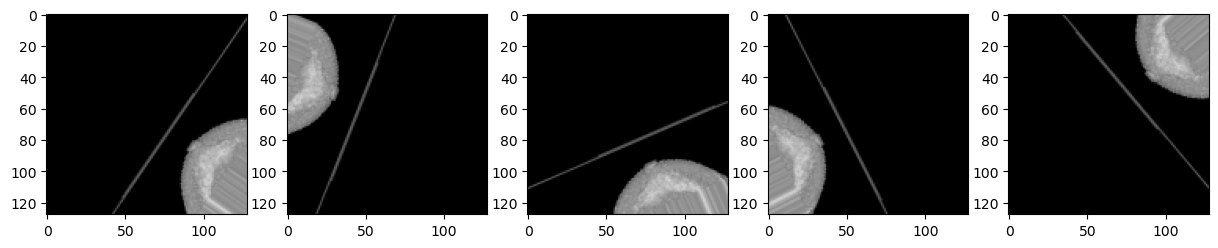

In [26]:
# Load some sample images
img_path = '/kaggle/input/rsna-breast-cancer-512-pngs/10006_462822612.png'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))

# Convert image to numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Add a batch dimension to the array
img_array = np.expand_dims(img_array, axis=0)

# Generate augmented images using the flow() method
aug_iter = train_datagen.flow(img_array, batch_size=1)

# Visualize the augmented images
fig, ax = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    aug_img = next(aug_iter)[0]
    ax[i].imshow(aug_img)
plt.show()

**Modelling**

In [27]:
def UNet(inputs):
    # First convolution block
    x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    d1_con = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(x)
    d1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d1_con)
    
    # Second convolution block
    d2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d1)
    d2_con = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d2)

    d2 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d2_con)
    
    # Third convolution block
    d3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d2)
    d3_con = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d3)
    d3 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d3_con)
    
     # Fourth convolution block
    d4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d3)
    d4_con = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d4)
    d4 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d4_con)
    
    # Bottleneck layer
    b = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d4)
    b = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(b)
    
    # First upsampling block
    u1 = tf.keras.layers.Conv2DTranspose(512, 3, strides =(2,2),padding='same')(b)
    u1 = tf.keras.layers.Concatenate(axis=3)([u1, d4_con])
    u1 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u1)
    u1 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u1)
    
    # Second upsampling block
    u2 = tf.keras.layers.Conv2DTranspose(256, 3, strides =(2,2),padding='same')(u1)
    u2 = tf.keras.layers.Concatenate(axis=3)([u2, d3_con])
    u2 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u2)
    u2 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u2)
    
     # Third upsampling block
    u3 = tf.keras.layers.Conv2DTranspose(128, 3, strides =(2,2),padding='same')(u2)
    u3 = tf.keras.layers.Concatenate(axis=3)([u3, d2_con])
    u3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u3)
    u3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u3)
    
    # Fourth upsampling block
    u4 = tf.keras.layers.Conv2DTranspose(64, 3, strides =(2,2),padding='same')(u3)
    u4 = tf.keras.layers.Concatenate(axis=3)([u4, d1_con])
    u4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u4)
    u4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u4)
    
     
    # Flatten and output
    flat = tf.keras.layers.Flatten()(u4)
    hid1 = tf.keras.layers.Dense(units=50, activation='relu')(flat)
    out = tf.keras.layers.Dense(units=1, activation='softmax')(hid1)
    model = tf.keras.Model(inputs=[inputs], outputs=[out])
    return model

In [28]:
from keras.metrics import Accuracy

auc = tf.keras.metrics.AUC(multi_label=True,thresholds=[0,0.5])
aucpr = tf.keras.metrics.AUC(curve='PR',multi_label=True,thresholds=[0,0.5])
inputs = tf.keras.layers.Input(shape=(128,128,3))
unet = UNet(inputs)
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=[auc,aucpr]) #,tf.keras.metrics.Accuracy()
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [29]:
model_history = unet.fit(train_gen, epochs=5, validation_data=val_gen)

Epoch 1/5
131/131 [==============================] - 72s 305ms/step - loss: 11.8700 - auc: 0.5000 - auc_1: 0.5000 - val_loss: 0.6932 - val_auc: 0.5000 - val_auc_1: 0.5000
Epoch 2/5
131/131 [==============================] - 31s 235ms/step - loss: 0.6942 - auc: 0.5000 - auc_1: 0.5000 - val_loss: 0.6932 - val_auc: 0.5000 - val_auc_1: 0.5000
Epoch 3/5
131/131 [==============================] - 32s 242ms/step - loss: 0.6933 - auc: 0.5000 - auc_1: 0.5000 - val_loss: 0.6932 - val_auc: 0.5000 - val_auc_1: 0.5000
Epoch 4/5
131/131 [==============================] - 31s 239ms/step - loss: 0.6932 - auc: 0.5000 - auc_1: 0.5000 - val_loss: 0.6932 - val_auc: 0.5000 - val_auc_1: 0.5000
Epoch 5/5
131/131 [==============================] - 31s 237ms/step - loss: 0.6932 - auc: 0.5000 - auc_1: 0.5000 - val_loss: 0.6932 - val_auc: 0.5000 - val_auc_1: 0.5000


**Model loss**

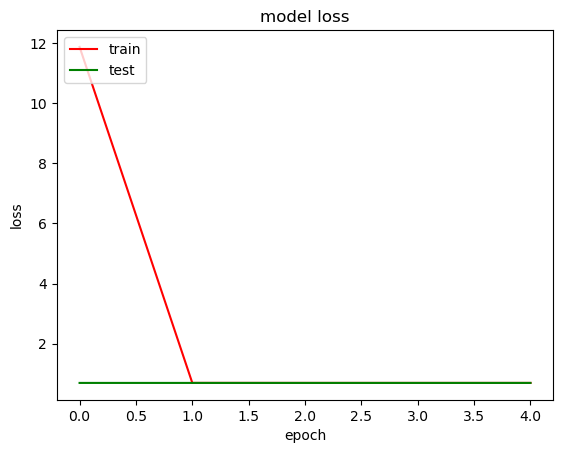

In [30]:
plt.plot(model_history.history['loss'], color='red')
plt.plot(model_history.history['val_loss'], color='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')



plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Evaluate model on test data
evaluation_metrics = unet.evaluate(val_gen)

evaluation_metrics

# for train_gen : loss: 0.6638 - accuracy: 0.6247 - auc_10: 0.5000 - auc_11: 0.6247
# for val_gen : loss: 1.1809 - accuracy: 0.0000e+00 - auc_10: 0.0000e+00 - auc_11: 0.0000e+00
# for test_gen : loss: 0.7860 - accuracy: 0.5000 - auc_10: 0.5000 - auc_11: 0.5000

29/29 [==============================] - 2s 69ms/step - loss: 0.6932 - auc: 0.5000 - auc_1: 0.5000


[0.6931537985801697, 0.5, 0.5]

In [32]:
df_temp1 = df4.loc[df4['cancer']==0]
non_canc_path = df_temp1['img_path'].iloc[0]
non_canc_path

'/kaggle/input/rsna-breast-cancer-512-pngs/10006_462822612.png'

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = non_canc_path
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0 # normalize the pixel value

# make a prediction on the input image
preds = unet.predict(img_array)

# get the predicted class by taking the argmax of the output
predicted_class = np.argmax(preds, axis=-1)[0]

# print the predicted class
print('Predicted class:', predicted_class)


1/1 [==============================] - 1s 1s/step
Predicted class: 0
